In [9]:
%matplotlib inline 
import matplotlib
from dolfin import *
from __future__ import print_function
import math as m
import sympy as sym


x, y, t = sym.symbols('x[0], x[1], t')



# ue = x*(1-x)*y*(1-y)


def exact(ue, sigma = 1.0, mu = 10**(-6), b=as_vector([2.0, 3.0])):
    # Exact Solution
    
    ue = sym.simplify(ue)
    u_code = sym.printing.ccode(ue)
    u_code = u_code.replace('M_PI','DOLFIN_PI')

    # du/dt - mu*Laplace(u) + div(bu) + sigma*u = f
    fe = sym.diff(ue,t) - mu*(sym.diff(sym.diff(ue,x),x) + sym.diff(sym.diff(ue,y),y))
    fe += b[0]*sym.diff(ue,x) + b[1]*sym.diff(ue,y)
    fe += sigma*ue

    f_code = sym.printing.ccode(fe)
    f_code = f_code.replace('M_PI','DOLFIN_PI')


    print(u_code)

    print(f_code)

In [11]:
exact(t+x**2+y**2)

t + pow(x[0], 2) + pow(x[1], 2)
1.0*t + 1.0*pow(x[0], 2) + 4.0*x[0] + 1.0*pow(x[1], 2) + 6.0*x[1] + 0.999996


In [10]:
# c = 16.0*sym.sin(sym.pi*t)
# h = x*(1-x)*y*(1-y)
# g = 2*mu**(-0.5)*(0.25**2 - (x - 0.5)**2 - (y - 0.5)**2 )
# iliescu = c*h*(0.5+sym.atan(g)/sym.pi)

NameError: name 'mu' is not defined

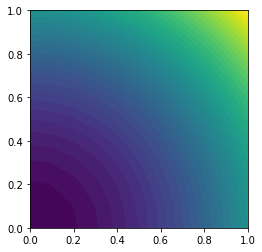

In [15]:
u = Expression('t + pow(x[0], 2) + pow(x[1], 2)', degree=2, t=0)
mesh = UnitSquareMesh(10,10)
Q = FunctionSpace(mesh, 'P', 2)
u = interpolate(u,Q)
plot(u)